# **Proyecto Misión  Analisis Caso 4 Market Arrivals**
# **Grupo 10 Integrantes**

*   Judith Granados Granados
*   Angie Katherine Ardila Gomez
*   Dylan Ortega
*   David Julian Ortiz
*   Ramiro Andres Jaimes Blanco









# **Objetivo Principal**

Realizar un análisis exhaustivo de los datos de llegada de productos al mercado para identificar patrones, tendencias y factores determinantes de la variación de precios y demanda, con el fin de proponer estrategias de optimización que mejoren la toma de decisiones y la eficiencia de la cadena de suministro de la empresa Market Arrivals.


|


* Estudiar el comportamiento de  los precios (mínimo, máximo y modal) y la variacion de las cantidades de productos en el mercado, ciudades y estaciones, identificando patrones de interés para mejorar la toma de desiciones.

* Investigar la relación entre la cantidad de productos, los precios y otros factores como ubicación geográfica y estacionalidad, determinando los principales factores que influyen en los cambios de precios y volúmenes de productos que se solicitan.


* Implementar técnicas basicas de machine learning para predecir precios y volúmenes futuros, permitiendo anticipar demandas y ajustes en la gestión del mercado mejorando la gestión de la logística y los inventarios.







El grupo de trabajo delibero y decidio trabajar el proyecto con el lenguage de Python y las librerias necesarias para hacer el analisis de la informacion.

# **Distribucion de Tareas mediante aplicacion de trabajo colaboratibo Monday**
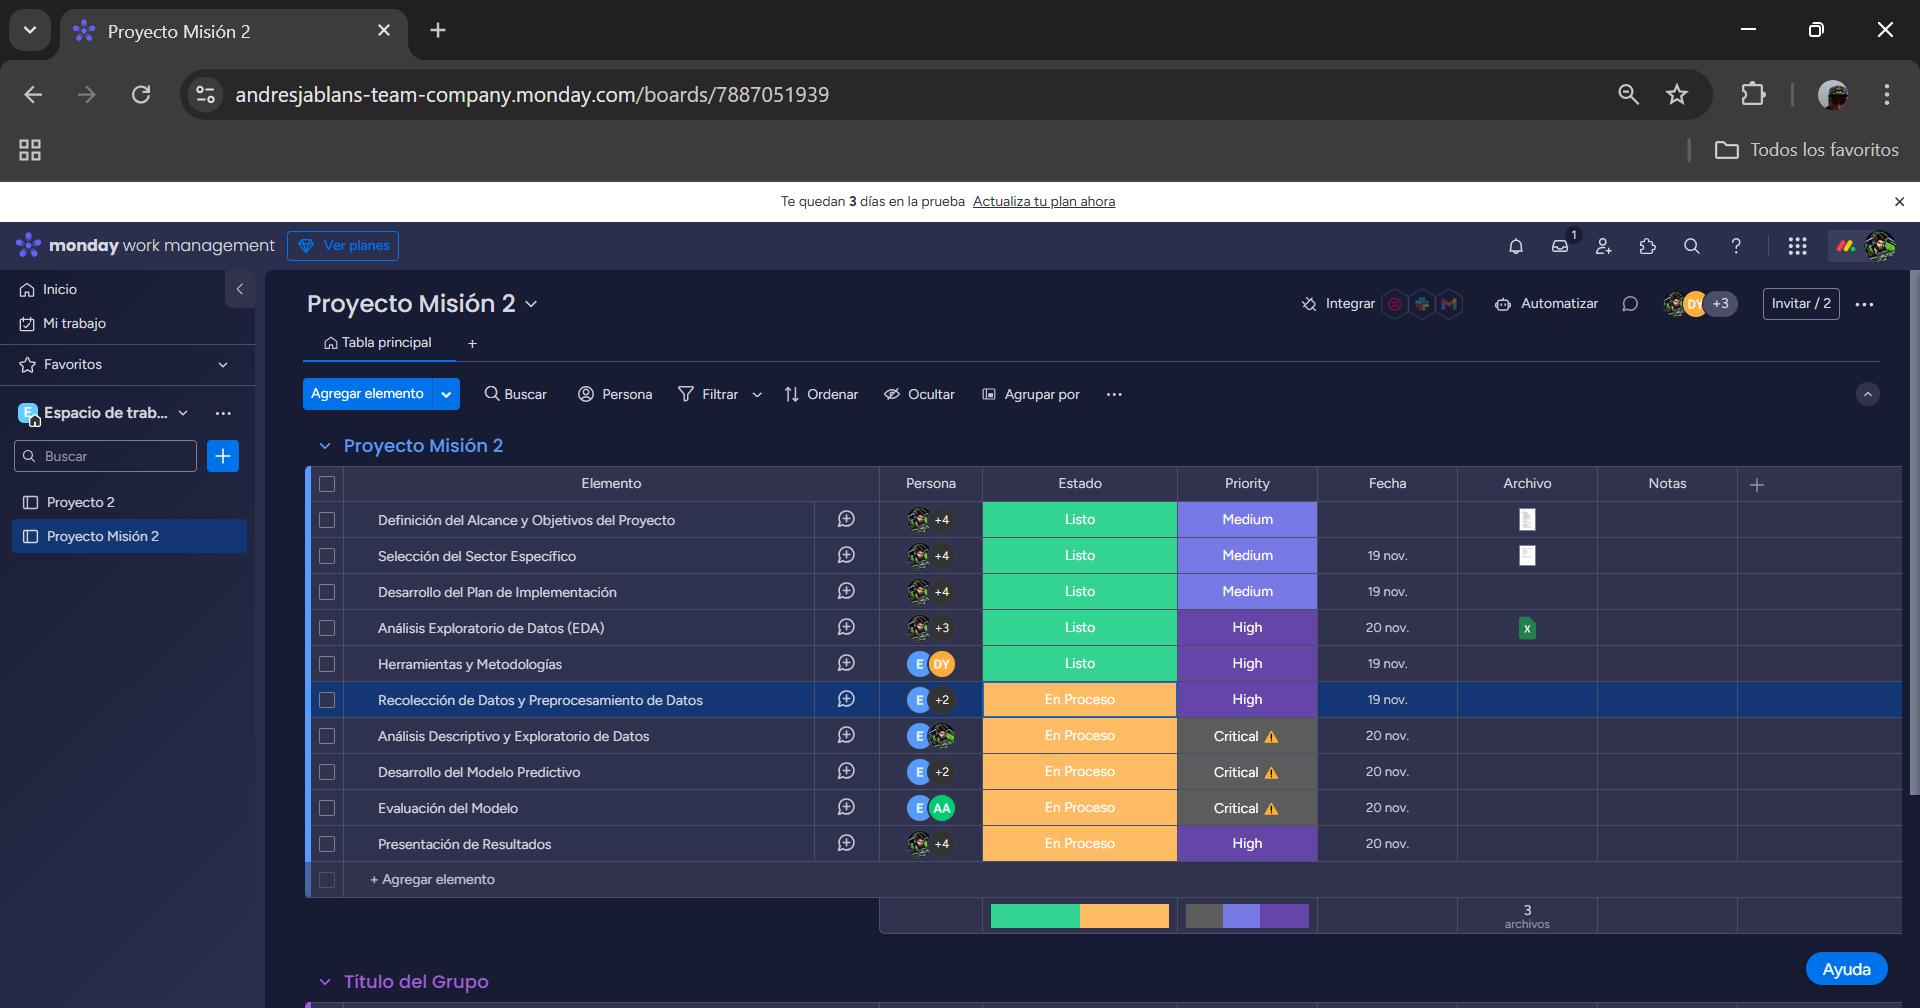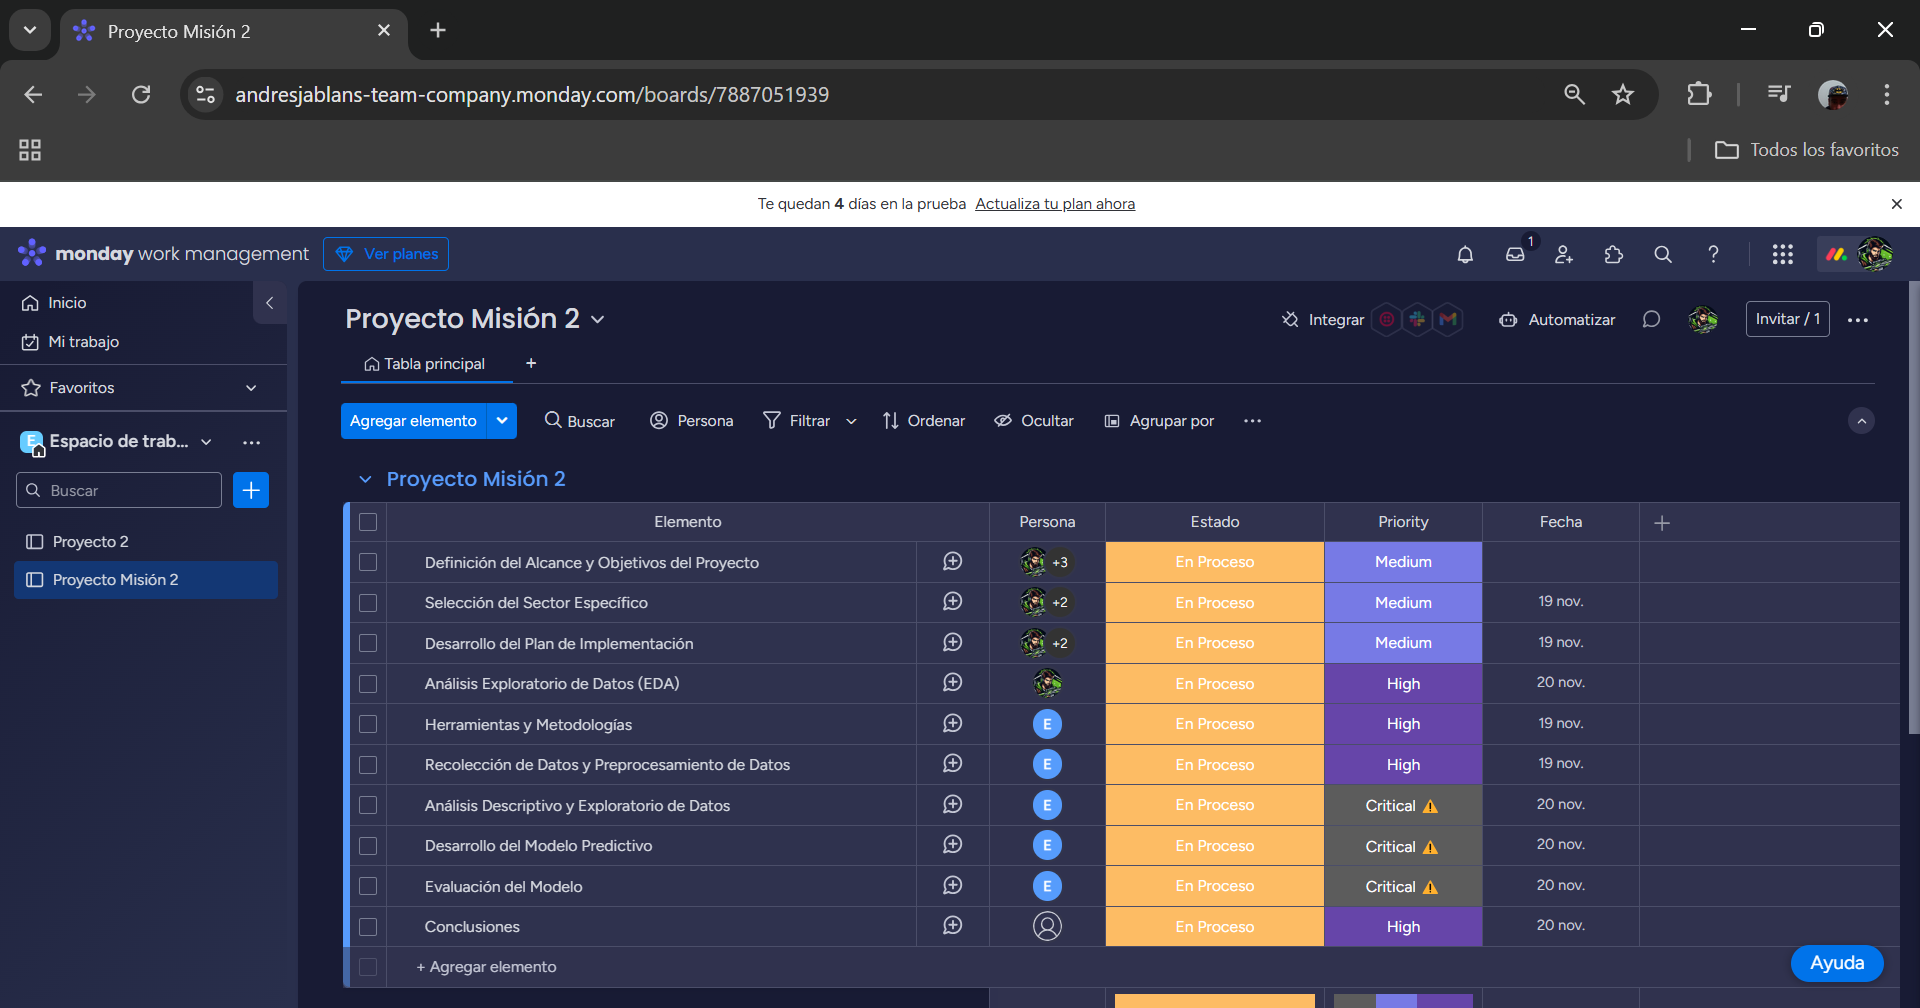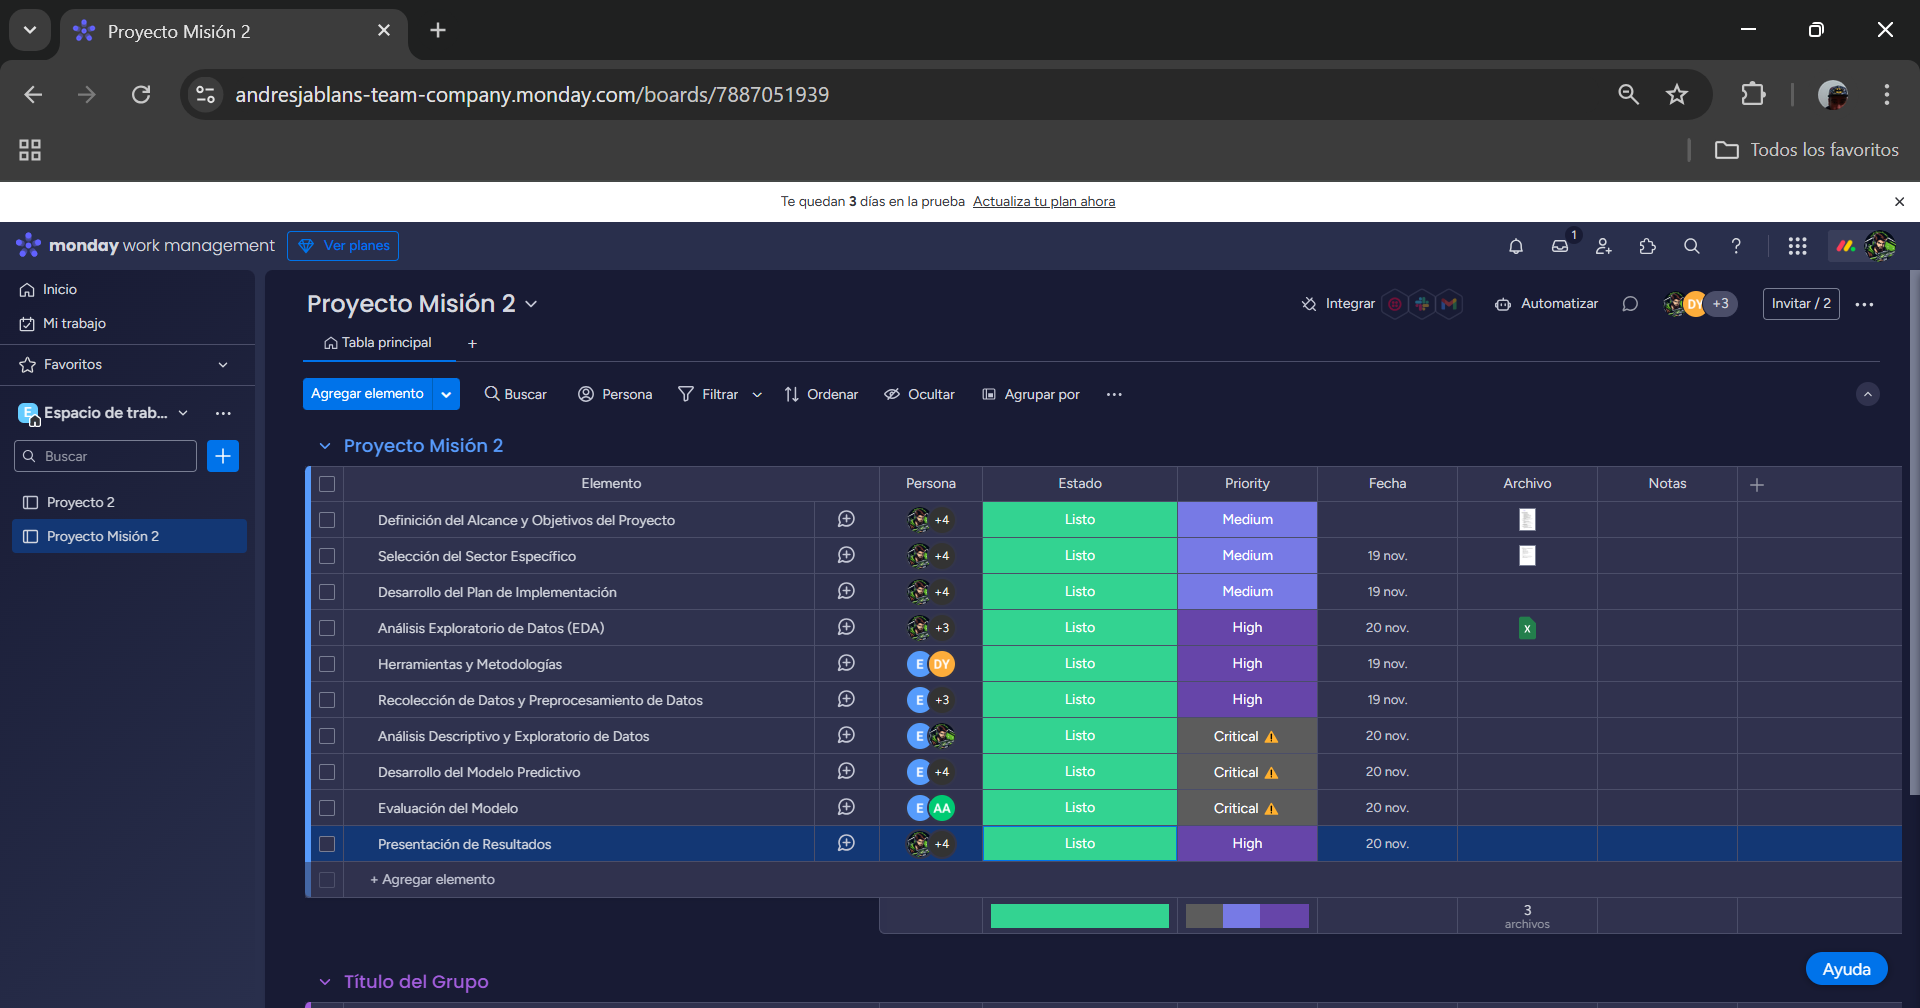

In [ ]:
#Importacion de Librerias
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
#Carga de  datos
df = pd.read_csv("MarketArrivals.csv")
df.head(5)

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [ ]:
#Verificacion y Limpieza inicial de los datos
print(df.info())
print(df.isnull().sum())
df['date'] = pd.to_datetime(df['date'])
df.drop_duplicates(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   market    10227 non-null  object        
 1   month     10227 non-null  object        
 2   year      10227 non-null  int64         
 3   quantity  10227 non-null  int64         
 4   priceMin  10227 non-null  int64         
 5   priceMax  10227 non-null  int64         
 6   priceMod  10227 non-null  int64         
 7   state     10227 non-null  object        
 8   city      10227 non-null  object        
 9   date      10227 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 799.1+ KB
None
market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64


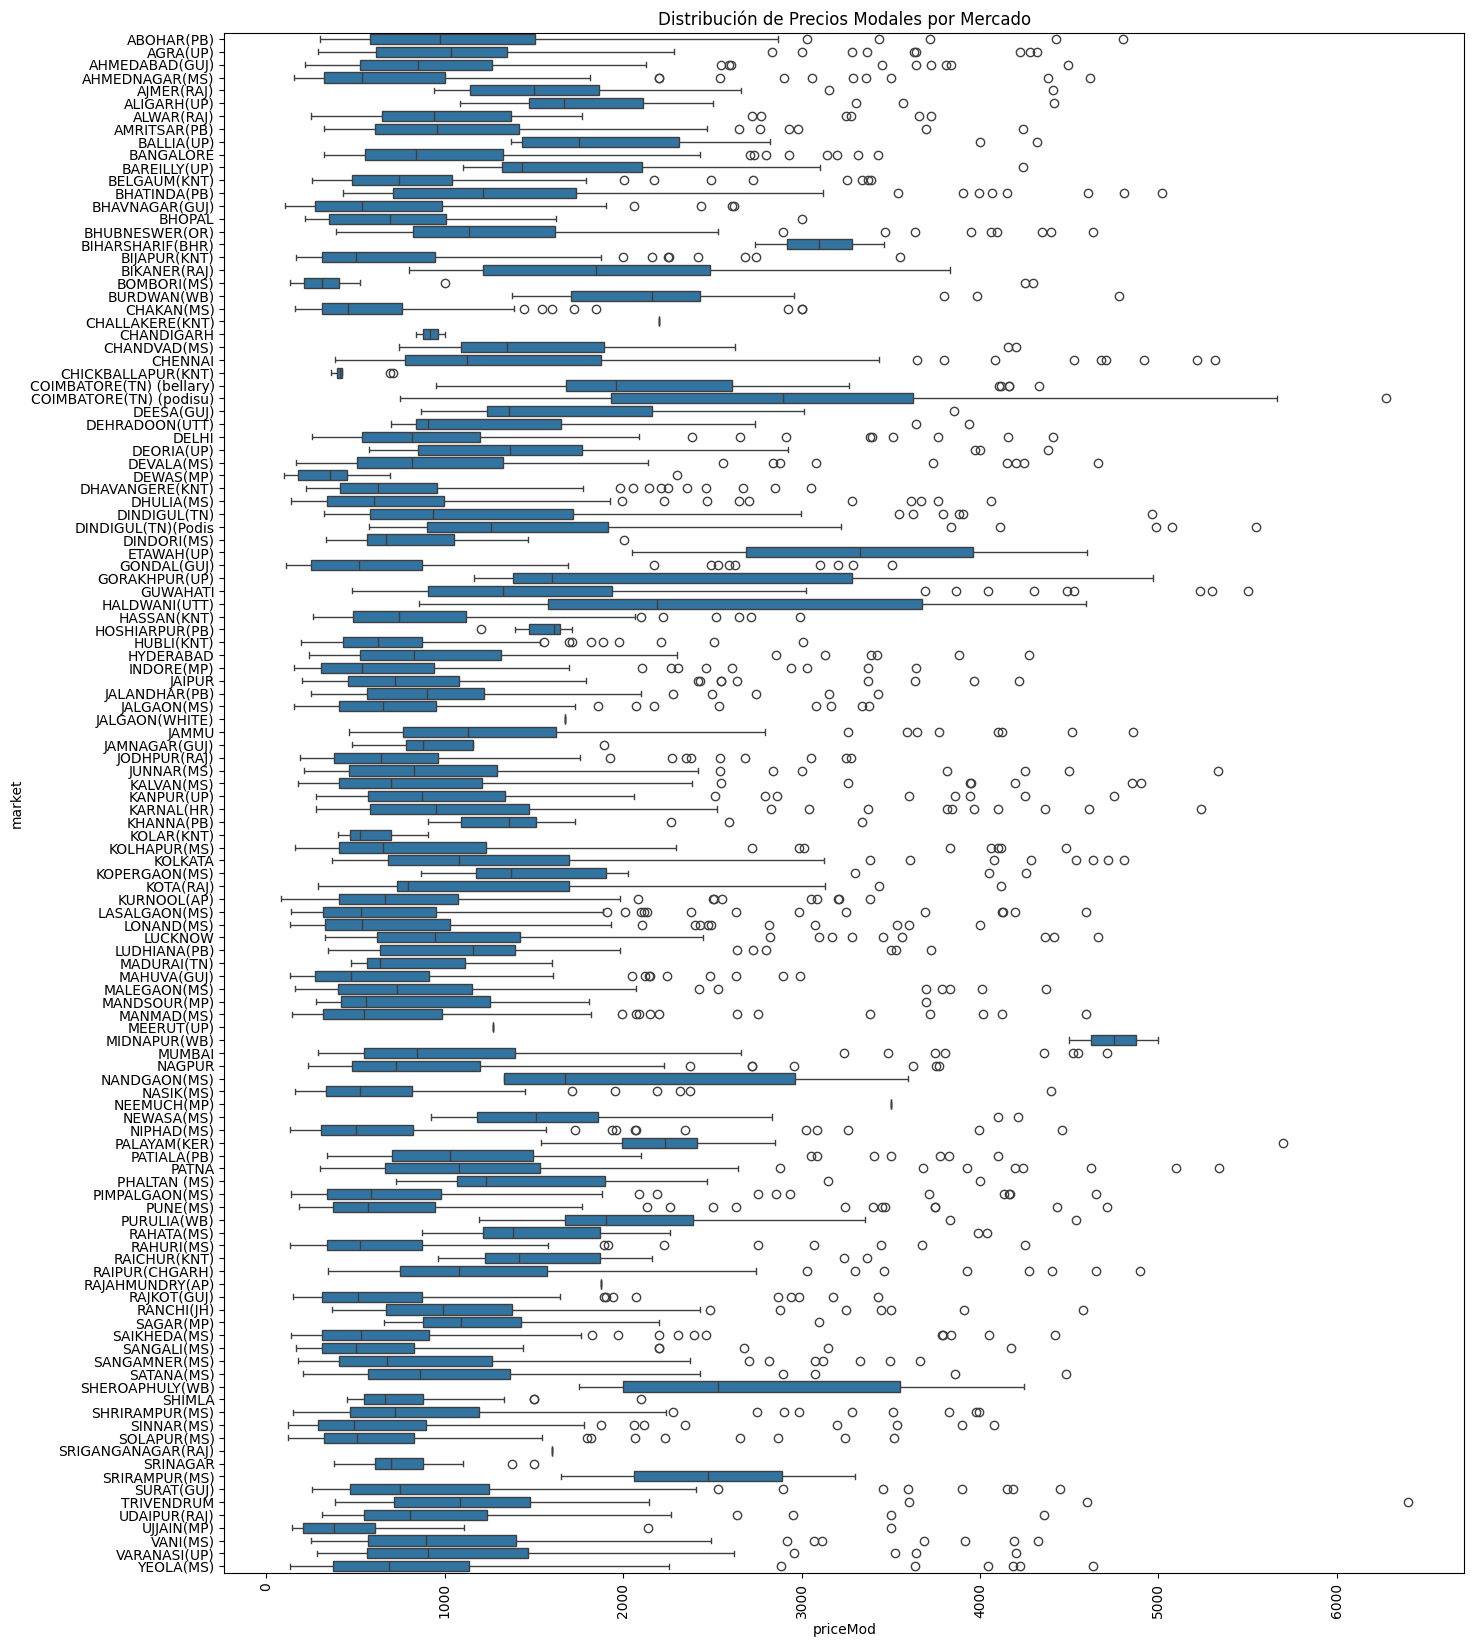

In [ ]:
#Análisis Exploratorio de Datos (EDA)
# Gráfico de boxplot para precios por mercado
plt.figure(figsize=(16, 20))
sns.boxplot(data=df, x='priceMod', y='market')
plt.title('Distribución de Precios Modales por Mercado')
plt.xticks(rotation=90)
plt.show()


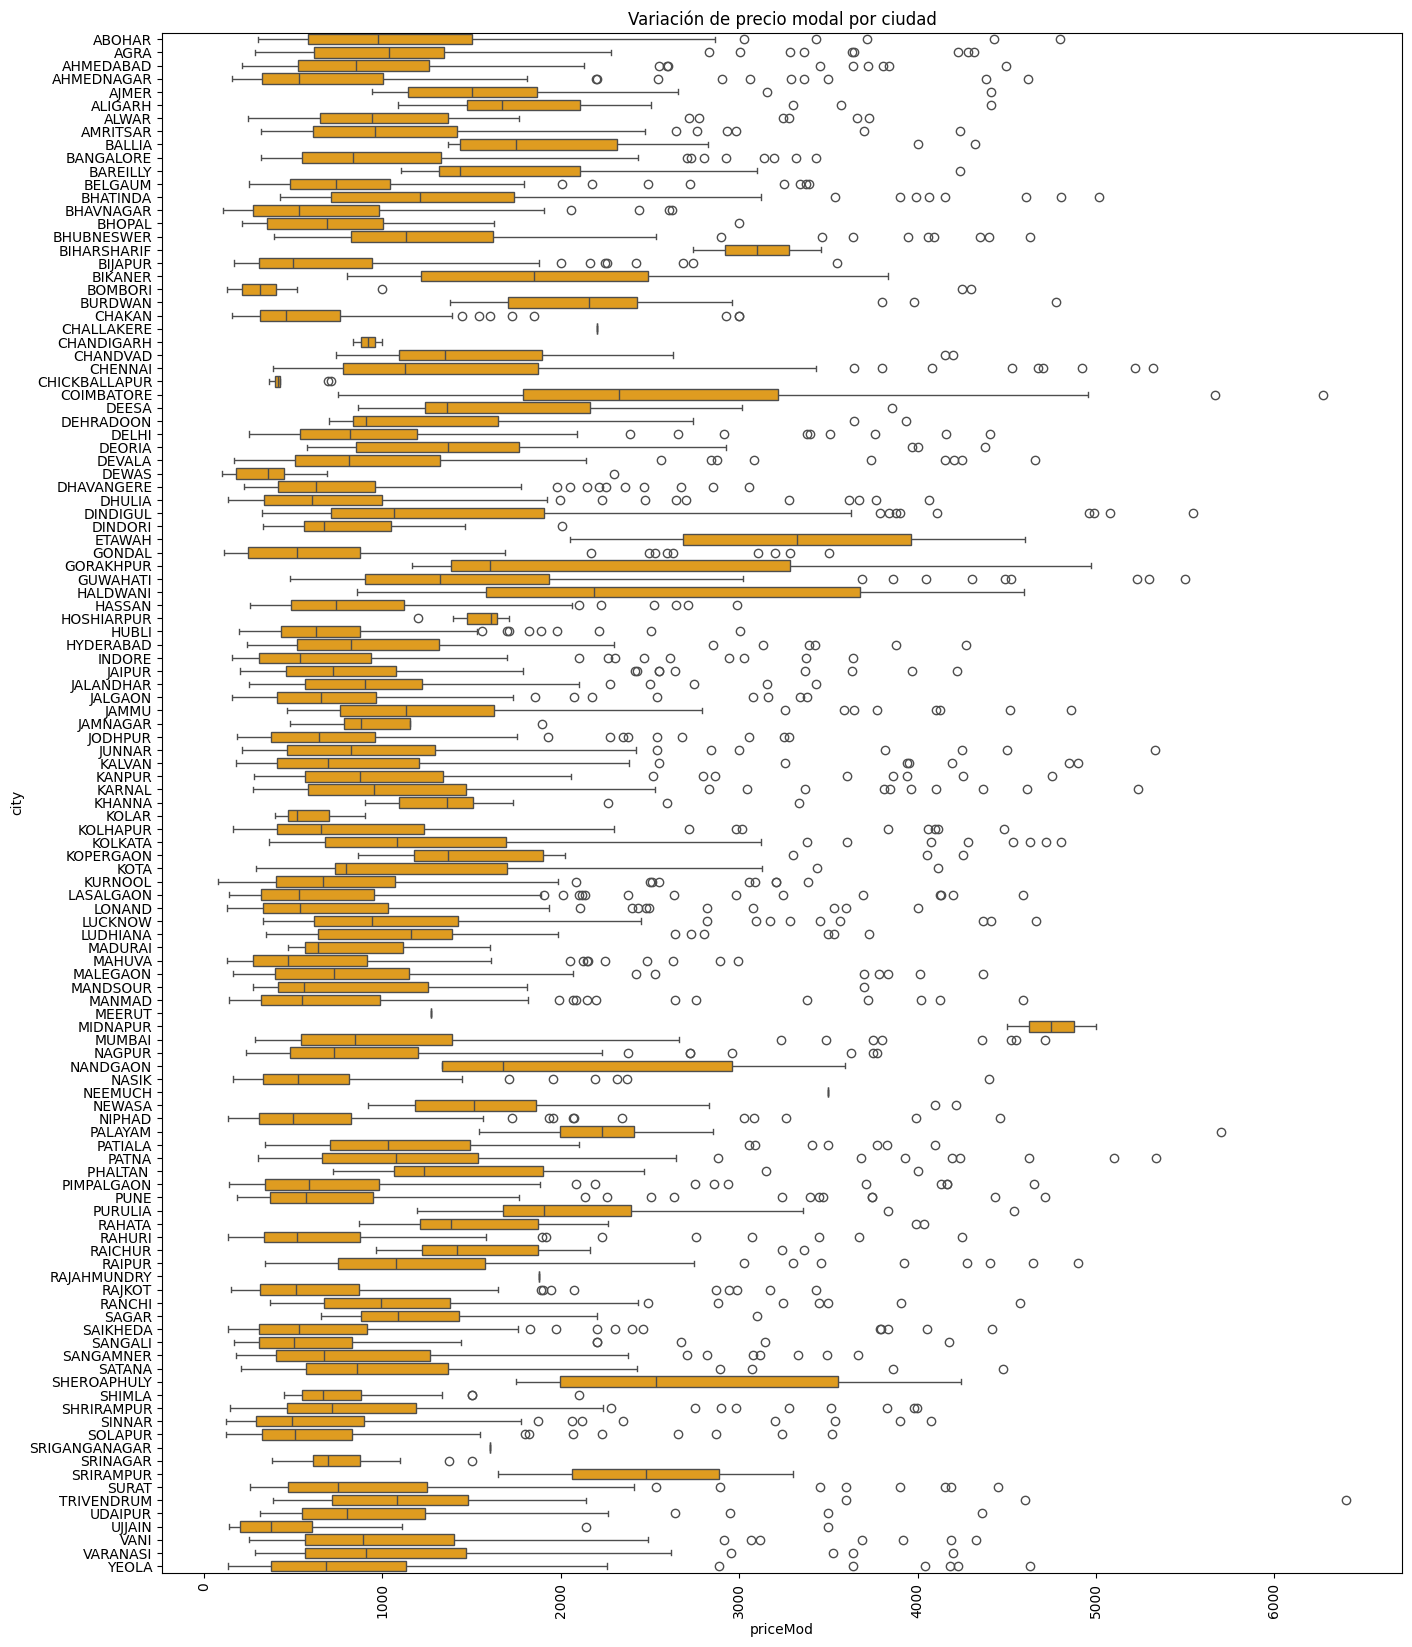

In [ ]:
plt.figure(figsize=(16 , 20))
sns.boxplot(x='priceMod', y='city', data=df,color='orange')
plt.title('Variación de precio modal por ciudad')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Agregar columna de estación basada en la fecha
df['season'] = df['date'].dt.month % 12 // 3 + 1
season_map = {1: 'Invierno', 2: 'Primavera', 3: 'Verano', 4: 'Otoño'}
df['season'] = df['season'].map(season_map)
df.head(5)


,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,season
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01,Invierno
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01,Invierno
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01,Invierno
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01,Invierno
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01,Invierno


<ipython-input-8-2f9ed6913270>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='season', y='quantity', ci=None, palette='viridis')
<ipython-input-8-2f9ed6913270>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='season', y='quantity', ci=None, palette='viridis')


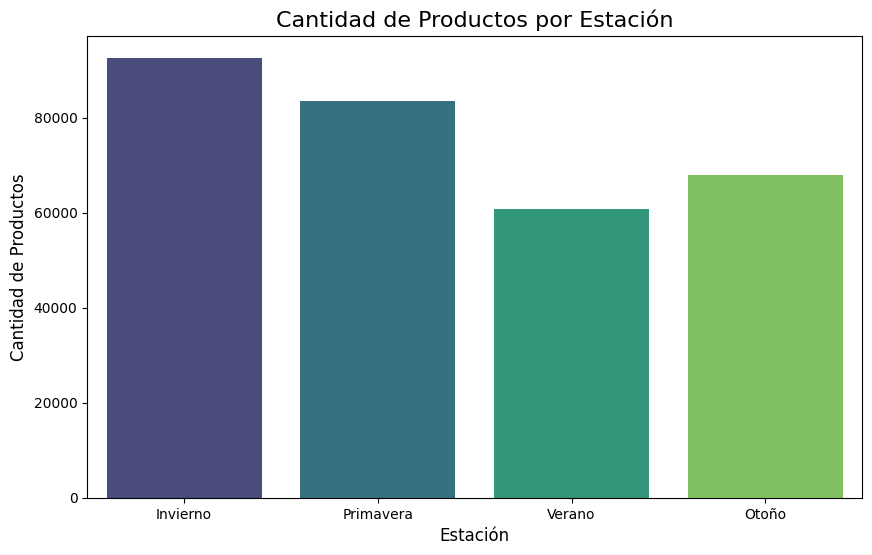

In [ ]:
# Gráfico de barras para cantidad de productos por estación
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='season', y='quantity', ci=None, palette='viridis')
plt.title('Cantidad de Productos por Estación', fontsize=16)
plt.xlabel('Estación', fontsize=12)
plt.ylabel('Cantidad de Productos', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<ipython-input-9-dc94604b2bbe>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_quantity.index, y=season_quantity.values, palette="viridis")


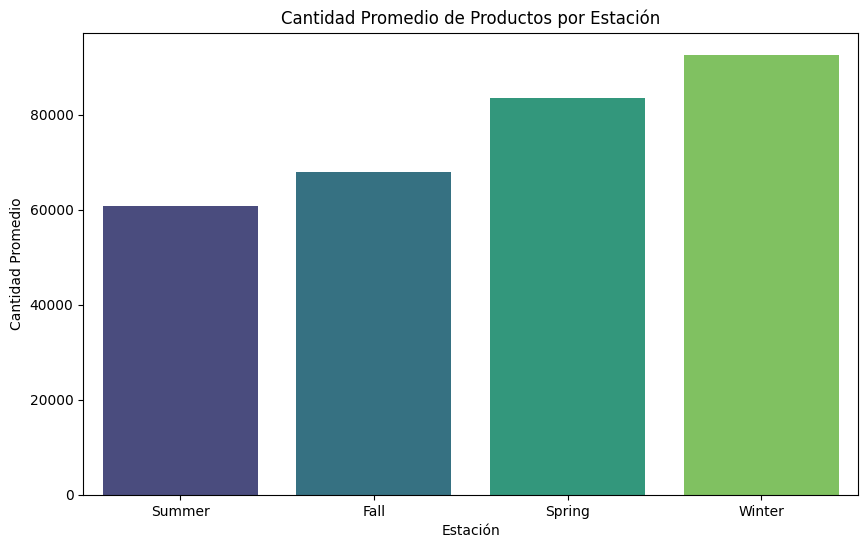

In [ ]:
# Asociar meses con estaciones
def assign_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['month'].apply(assign_season)

# Analizar la cantidad promedio por estación
season_quantity = df.groupby('season')['quantity'].mean().sort_values()

# Visualizar el impacto de las estaciones en la cantidad
plt.figure(figsize=(10, 6))
sns.barplot(x=season_quantity.index, y=season_quantity.values, palette="viridis")
plt.title('Cantidad Promedio de Productos por Estación')
plt.ylabel('Cantidad Promedio')
plt.xlabel('Estación')
plt.show()



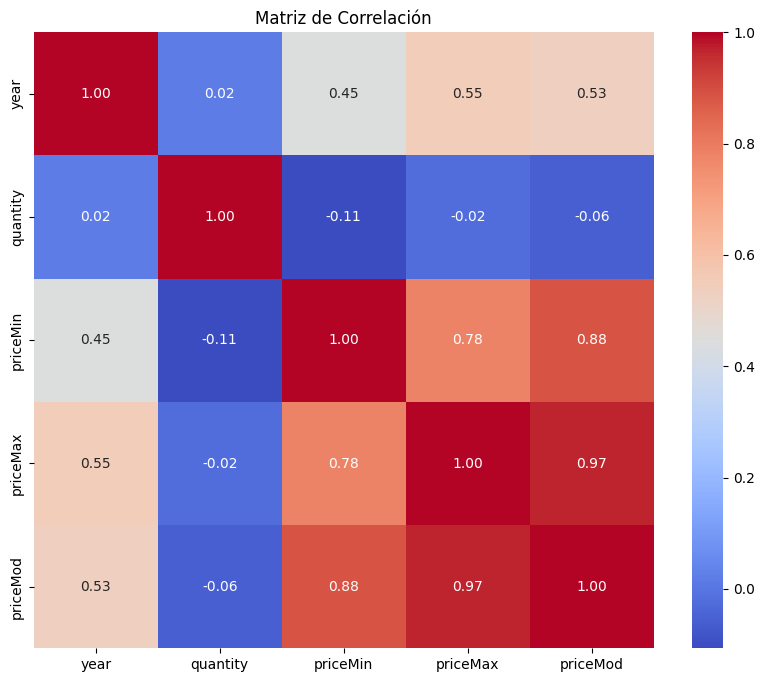

In [ ]:
# Matriz de correlación
correlation_matrix = df[['year','quantity', 'priceMin', 'priceMax', 'priceMod']].corr()

# Mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
#Prediccion de Precios
# Seleccionar variables predictoras y objetivos
X = df[['quantity', 'priceMod']]
y_max = df['priceMax']
y_min = df['priceMin']

# División en entrenamiento y prueba
X_train, X_test, y_max_train, y_max_test = train_test_split(X, y_max, test_size=0.2, random_state=42)
_, _, y_min_train, y_min_test = train_test_split(X, y_min, test_size=0.2, random_state=42)


In [ ]:
# Crear modelos
model_max = LinearRegression()
model_min = LinearRegression()

# Entrenar los modelos
model_max.fit(X_train, y_max_train)
model_min.fit(X_train, y_min_train)

# Predicciones
y_max_pred = model_max.predict(X_test)
y_min_pred = model_min.predict(X_test)

# Evaluación del modelo
mse_max = mean_squared_error(y_max_test, y_max_pred)
mse_min = mean_squared_error(y_min_test, y_min_pred)

print(f'Error Cuadrático Medio (Máximo): {mse_max}')
print(f'Error Cuadrático Medio (Mínimo): {mse_min}')

Error Cuadrático Medio (Máximo): 65820.098926315
Error Cuadrático Medio (Mínimo): 107725.35038419753


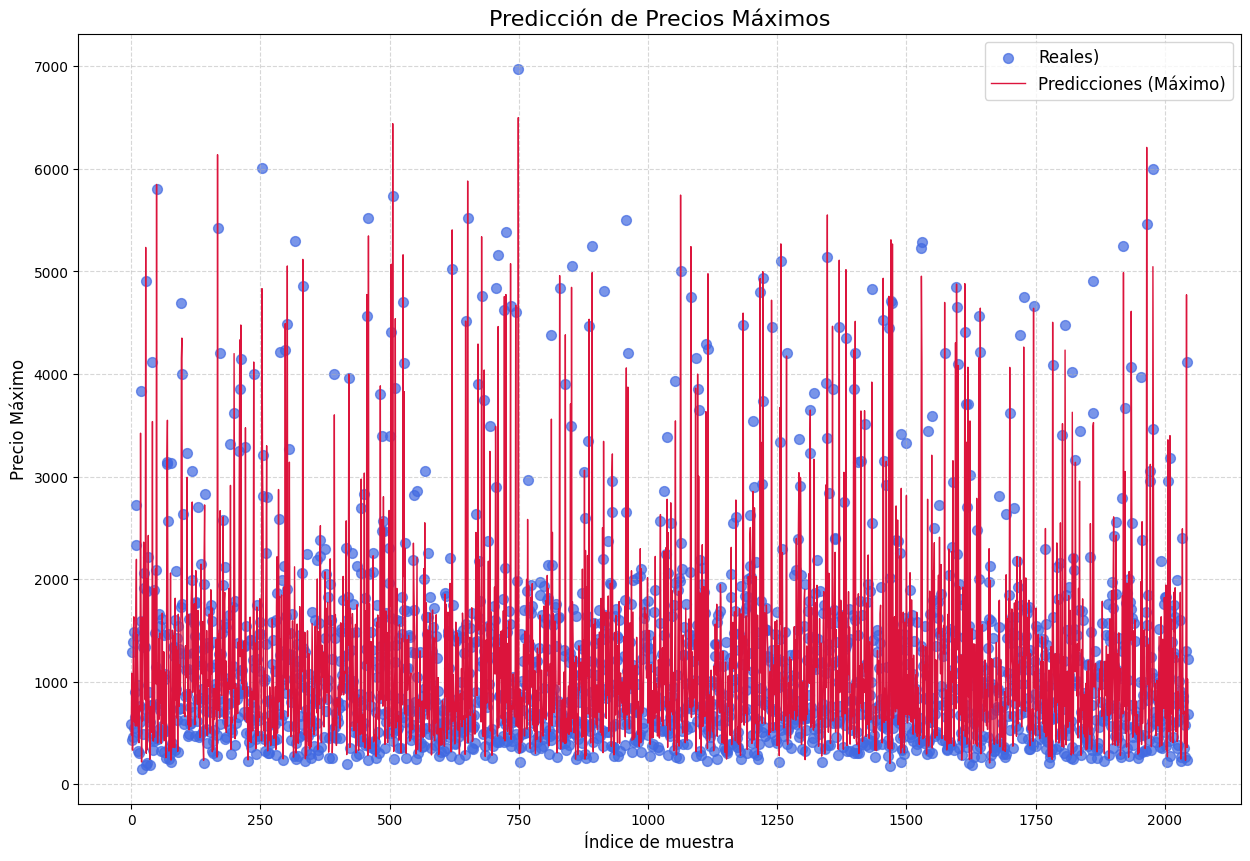

In [ ]:
# Comparación de precios máximos
plt.figure(figsize=(15, 10))
plt.scatter(range(len(y_max_test)), y_max_test, color='royalblue', label='Reales)',
            s=50, alpha=0.7,  marker='o')
plt.plot(range(len(y_max_pred)), y_max_pred, color='crimson', label='Predicciones (Máximo)',
         linewidth=1)
plt.title('Predicción de Precios Máximos', fontsize=16)
plt.xlabel('Índice de muestra', fontsize=12)
plt.ylabel('Precio Máximo', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


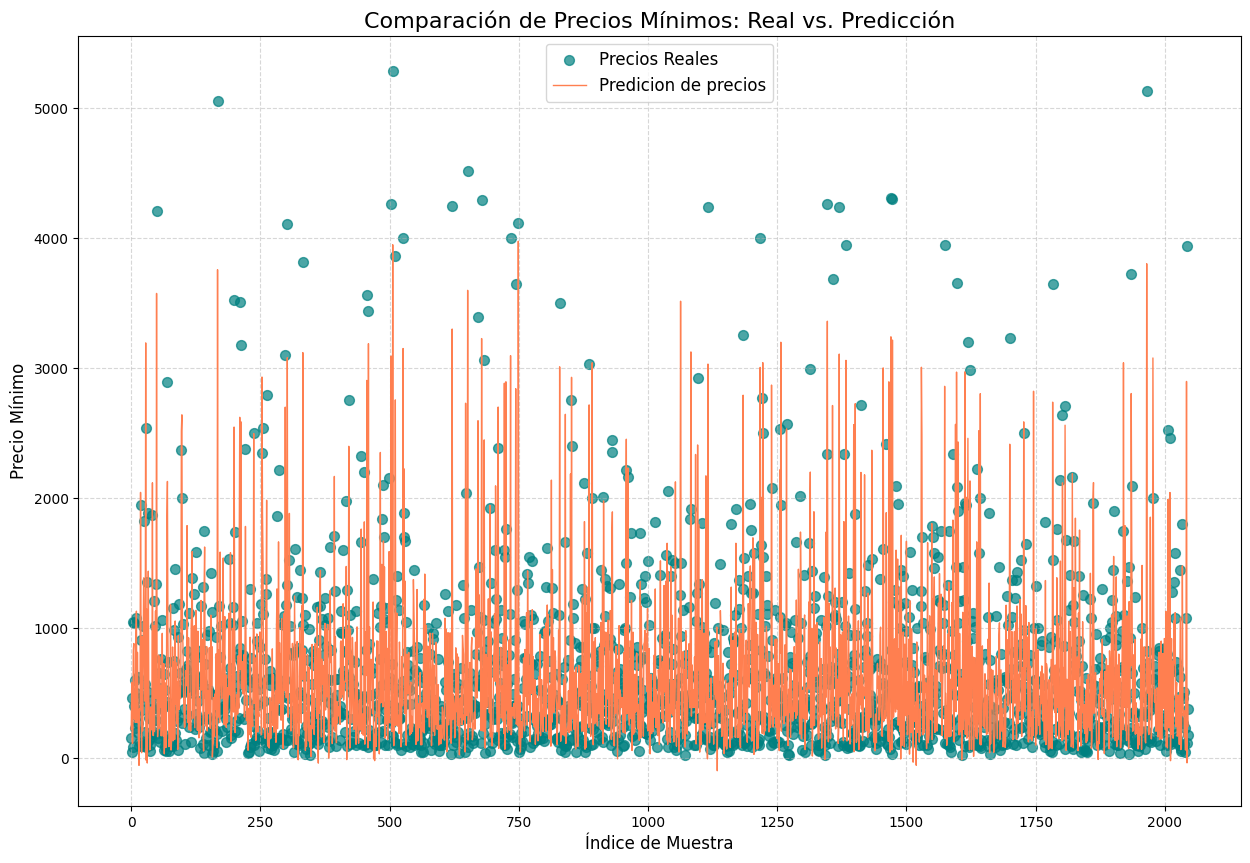

In [ ]:
# Comparación de precios mínimos
plt.figure(figsize=(15, 10))
plt.scatter(range(len(y_min_test)), y_min_test, color='teal', label='Precios Reales',
            alpha=0.7, s=50)
plt.plot(range(len(y_min_pred)), y_min_pred, color='coral', label='Predicion de precios', linewidth=1)
plt.title('Comparación de Precios Mínimos: Real vs. Predicción', fontsize=16)
plt.xlabel('Índice de Muestra', fontsize=12)
plt.ylabel('Precio Mínimo', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
#prediciones
# Seleccionar variables relevantes para la predicción
features = ['year', 'priceMin', 'priceMax']
target_price = 'priceMod'
target_quantity = 'quantity'

# Dividir los datos para predecir el precio modal
X_price = df[features]
y_price = df[target_price]

X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X_price, y_price, test_size=0.2, random_state=42)

# Modelo para precio modal
model_price = LinearRegression()
model_price.fit(X_train_price, y_train_price)

# Predicciones
y_pred_price = model_price.predict(X_test_price)

# Evaluar el modelo
mse_price = mean_squared_error(y_test_price, y_pred_price)
r2_price = r2_score(y_test_price, y_pred_price)

# Dividir los datos para predecir la cantidad
X_quantity = df[features]
y_quantity = df[target_quantity]

X_train_quantity, X_test_quantity, y_train_quantity, y_test_quantity = train_test_split(X_quantity, y_quantity, test_size=0.2, random_state=42)

# Modelo para cantidad
model_quantity = LinearRegression()
model_quantity.fit(X_train_quantity, y_train_quantity)

# Predicciones
y_pred_quantity = model_quantity.predict(X_test_quantity)

# Evaluar el modelo
mse_quantity = mean_squared_error(y_test_quantity, y_pred_quantity)
r2_quantity = r2_score(y_test_quantity, y_pred_quantity)

mse_price, r2_price, mse_quantity, r2_quantity

print("Evaluación del modelo para precio modal:")
print(f"Mean Squared Error (MSE): {mse_price:.2f}")
print(f"R² Score: {r2_price:.2f}\n")

print("Evaluación del modelo para cantidad:")
print(f"Mean Squared Error (MSE): {mse_quantity:.2f}")
print(f"R² Score: {r2_quantity:.2f}")

Evaluación del modelo para precio modal:
Mean Squared Error (MSE): 18479.94
R² Score: 0.97

Evaluación del modelo para cantidad:
Mean Squared Error (MSE): 14119466615.41
R² Score: 0.02


In [ ]:
# Nuevos valores para realizar predicciones
nuevo_year = 2025
nuevo_priceMin = 1000
nuevo_priceMax = 1500

# Crear un DataFrame con los nuevos valores
nueva_prediccion = pd.DataFrame({
    'year': [nuevo_year],
    'priceMin': [nuevo_priceMin],
    'priceMax': [nuevo_priceMax]
})

# Predecir el precio modal (priceMod)
priceMod_prediccion = model_price.predict(nueva_prediccion)
print(f'La predicción del precio modal para el año {nuevo_year}, precio mínimo {nuevo_priceMin}, '
      f'y precio máximo {nuevo_priceMax} es: {round(priceMod_prediccion[0], 2)}')

# Predecir la cantidad (quantity)
quantity_prediccion = model_quantity.predict(nueva_prediccion)
print(f'La predicción de la cantidad para el año {nuevo_year}, precio mínimo {nuevo_priceMin}, '
      f'y precio máximo {nuevo_priceMax} es: {round(quantity_prediccion[0], 2)}')

La predicción del precio modal para el año 2025, precio mínimo 1000, y precio máximo 1500 es: 1282.49
La predicción de la cantidad para el año 2025, precio mínimo 1000, y precio máximo 1500 es: 91734.13


Coeficientes: [0.39590652 0.59613527]
Intercepción: 5.185407696206084
Ecuación del plano: y = 0.396 * priceMin + 0.596 * priceMax + 5.185
Coeficiente de determinación: 0.978


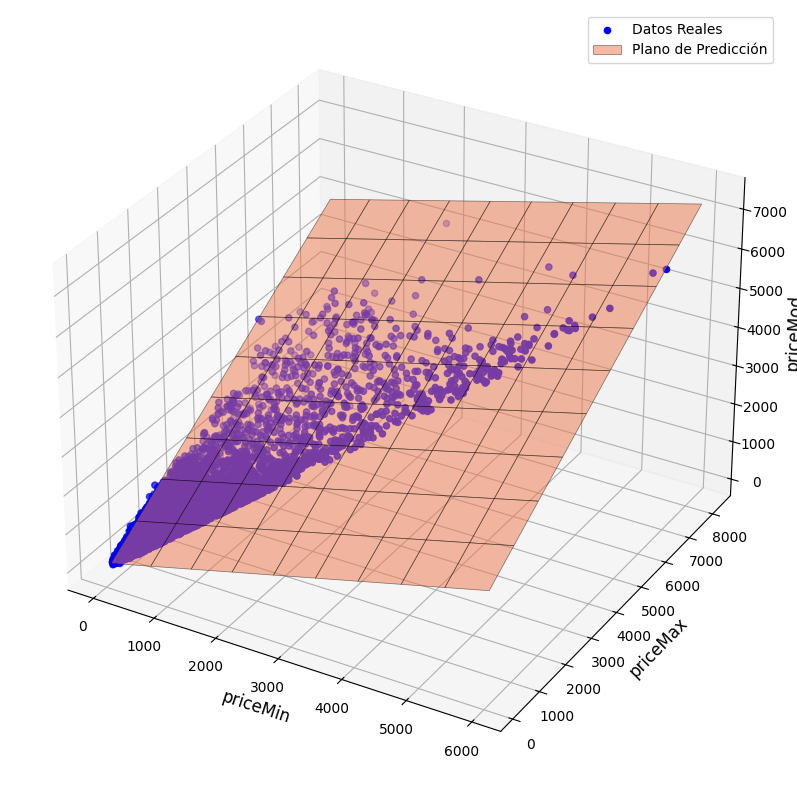

In [ ]:

# Definir variables
variables_x = ['priceMin', 'priceMax']
variable_y = 'priceMod'

# Entrenar el modelo
modelo = LinearRegression()
modelo.fit(df[variables_x], df[variable_y])

# Coeficientes e intercepción
print('Coeficientes:', modelo.coef_)
print('Intercepción:', modelo.intercept_)

# Ecuación del plano
print('Ecuación del plano: y = {} * priceMin + {} * priceMax + {}'.format(
    round(modelo.coef_[0], 3), round(modelo.coef_[1], 3), round(modelo.intercept_, 3)
))

# Coeficiente de determinación (R²)
print('Coeficiente de determinación:', round(r2_score(df[variable_y], modelo.predict(df[variables_x])), 3))

# Gráfica en 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Puntos originales
ax.scatter(df['priceMin'], df['priceMax'], df['priceMod'], color='blue', label='Datos Reales')

# Crear un meshgrid para graficar el plano
x = np.linspace(df['priceMin'].min(), df['priceMin'].max(), num=10)
y = np.linspace(df['priceMax'].min(), df['priceMax'].max(), num=10)
x, y = np.meshgrid(x, y)

# Calcular z (priceMod) del plano
z = modelo.intercept_ + modelo.coef_[0] * x + modelo.coef_[1] * y

# Graficar el plano
ax.plot_surface(x, y, z, alpha=0.5, color='coral', label='Plano de Predicción', edgecolor='black', linewidth=0.5)
ax.set_xlabel('priceMin', fontsize=12)
ax.set_ylabel('priceMax', fontsize=12)
ax.set_zlabel('priceMod', fontsize=12)
plt.legend()
plt.show()

In [ ]:
  #Analisis aplicando Kmeans
  # Selección de variables
  cluster_data = df[['quantity', 'priceMod', 'priceMin', 'priceMax']].dropna()

  # Normalización de los datos
  scaler = StandardScaler()
  cluster_data_scaled = scaler.fit_transform(cluster_data)


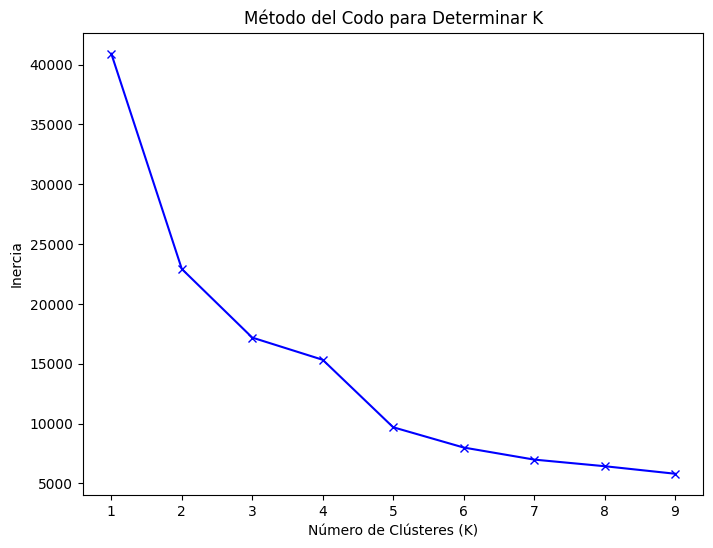

In [ ]:
distortions = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_data_scaled)
    distortions.append(kmeans.inertia_)

# Gráfico del método del codo
plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar K')
plt.show()


In [ ]:
# Aplicar K-Means con el número óptimo de clústeres (por ejemplo, K=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(cluster_data_scaled)

# Centroides de los clústeres
print("Centroides de los clústeres:")
print(kmeans.cluster_centers_)


Centroides de los clústeres:
[[ 0.06214233 -0.53323407 -0.4867914  -0.52273026]
 [-0.23469402  3.10262313  2.7766536   2.98679139]
 [-0.09072938  0.56223724  0.52434275  0.56203222]]


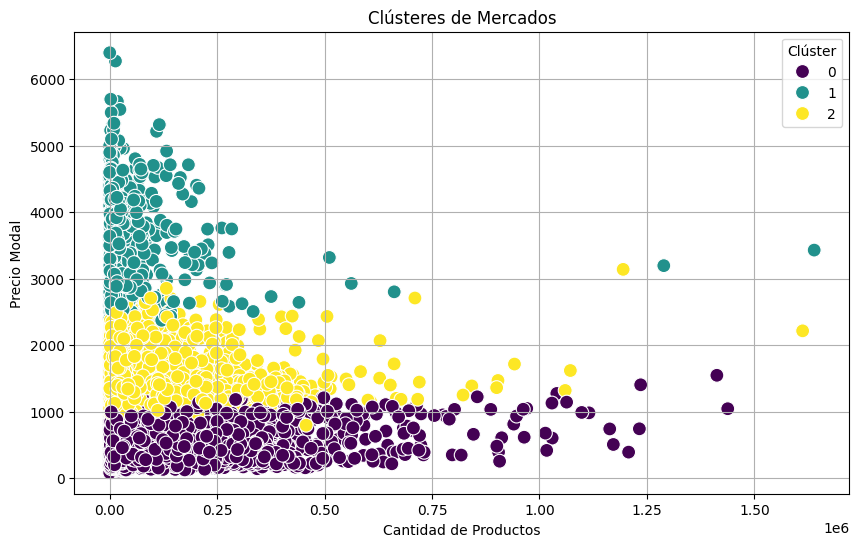

In [ ]:
# Visualización en un plano bidimensional
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=cluster_data['quantity'], y=cluster_data['priceMod'],
    hue=df['cluster'], palette='viridis', s=100
)
plt.title('Clústeres de Mercados')
plt.xlabel('Cantidad de Productos')
plt.ylabel('Precio Modal')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()


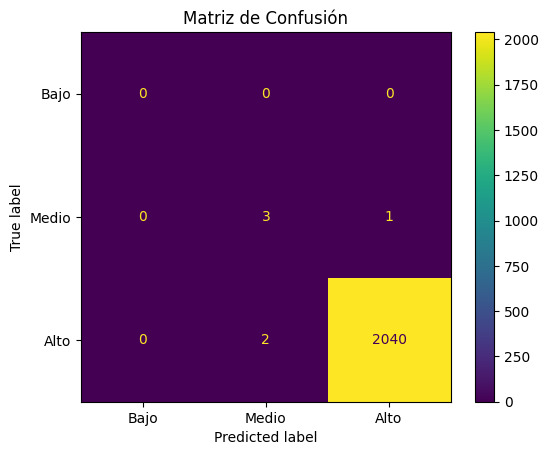

              precision    recall  f1-score   support

        Alto       1.00      1.00      1.00      2042
       Medio       0.60      0.75      0.67         4

    accuracy                           1.00      2046
   macro avg       0.80      0.87      0.83      2046
weighted avg       1.00      1.00      1.00      2046



In [ ]:
#Crear Matriz de confucion
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Crear clases para los precios (Bajo, Medio, Alto)
df['price_category'] = pd.cut(
    df['priceMod'], bins=[0, 50, 150, float('inf')], labels=['Bajo', 'Medio', 'Alto']
)

# Variables predictoras y objetivo
X = df[['quantity', 'priceMin', 'priceMax']].dropna()
y = df['price_category'].dropna()

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de clasificación
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Generar matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=['Bajo', 'Medio', 'Alto'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bajo', 'Medio', 'Alto'])

# Mostrar matriz de confusión
disp.plot(cmap='viridis')
disp.ax_.set_title('Matriz de Confusión')
plt.show()

# Reporte de clasificación
print(classification_report(y_test, y_pred))


Mejores Hiperparámetros: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


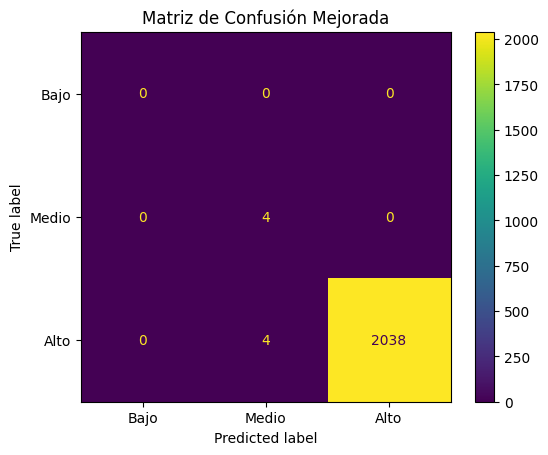

              precision    recall  f1-score   support

        Alto       1.00      1.00      1.00      2042
       Medio       0.50      1.00      0.67         4

    accuracy                           1.00      2046
   macro avg       0.75      1.00      0.83      2046
weighted avg       1.00      1.00      1.00      2046



In [ ]:
#Matriz de confucion Mejorada
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Crear clases para los precios (Bajo, Medio, Alto)
df['price_category'] = pd.cut(
    df['priceMod'], bins=[0, 50, 150, float('inf')], labels=['Bajo', 'Medio', 'Alto']
)

# Variables predictoras y objetivo
X = df[['quantity', 'priceMin', 'priceMax']].dropna()
y = df['price_category'].dropna()

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo base y los hiperparámetros para optimización
model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

# Optimizar el modelo con GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_
print("Mejores Hiperparámetros:", grid_search.best_params_)

# Predicciones con el mejor modelo
y_pred = best_model.predict(X_test)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=['Bajo', 'Medio', 'Alto'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bajo', 'Medio', 'Alto'])

# Mostrar la matriz de confusión
disp.plot(cmap='viridis')
disp.ax_.set_title('Matriz de Confusión Mejorada')
plt.show()

# Reporte de clasificación
print(classification_report(y_test, y_pred))


# **Conclusiones:**


*   Después de realizar el análisis exploratorio inicial, se identificó el
movimiento de los productos y los precios en cada estación del año. Los resultados muestran que el movimiento de los productos y los precios tiende a incrementarse desde el otoño, alcanzando su pico más alto durante el invierno, y descendiendo hacia su punto más bajo en verano. Se recomienda al cliente tener en cuenta esta estacionalidad para ajustar sus operaciones de manejo de envíos e inventario, maximizando el aprovechamiento de las temporadas altas y mitigando pérdidas en las temporadas bajas.

*   Se generó una predicción de los precios para estudiar su comportamiento. La predicción de los precios altos tiende a ser más precisa que la de los precios mínimos, lo que sugiere que este mercado está más orientado hacia precios altos. Se recomienda al cliente analizar qué factores adicionales afectan estos fenómenos y realizar los ajustes necesarios para maximizar las oportunidades de ventas en este segmento de mercado.

*   El análisis de la relación entre los precios máximos, mínimos y modales revela que, a lo largo del tiempo, la tendencia del precio del producto es generalmente al alza, sin cambios significativos. Esto implica que los precios de los productos están en una trayectoria ascendente continua.

*   Según el análisis realizado con el método de K-means, los mercados se agrupan en tres sectores o clústeres:
1.	Clúster púrpura: Representa los mercados con mayor volumen de ventas y movimiento, pero con un precio modal más bajo, lo que indica alta competitividad.
2.	Clúster amarillo: Representa un equilibrio entre los productos vendidos y el precio modal, lo que caracteriza a un mercado estable y maduro.
3.	Clúster verde: Representa mercados con poco movimiento y precios altos, posiblemente mercados de nicho ubicados en sectores exclusivos, lo que justificaría sus precios elevados.
Con base en esta segmentación, se sugieren las siguientes estrategias:
•	Personalización de la oferta: Cada clúster requiere una estrategia de producto y precio distinta.
•	Segmentación de marketing: Las campañas de marketing deben adaptarse a las características específicas de cada segmento.
•	Gestión de canales de distribución: Los canales deben seleccionarse según las preferencias y necesidades de cada clúster.
•	Optimización de recursos: Al comprender las diferencias entre los clústeres, se pueden asignar los recursos de manera más eficiente.

*   Finalmente, se generó una matriz de confusión para analizar el desempeño del modelo de predicción de los precios. Esta matriz confirmó que la tendencia generalizada es el alza de los precios altos. A pesar de los ajustes realizados al modelo, solo se lograron pequeñas mejoras en la predicción de los precios medios.













